In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.show()

In [2]:
df = pd.read_csv('/Users/mbair/Git/ConvexOptimizationWithPython/Data/banking-wages-data.csv', sep = ',')
print(df.isnull().sum())
print()
# Remove rows with null - the data is fairly uninformative in its current state so replacing null values with anything at this point is not going to help with later analysis
df.dropna(axis=0, how='any', inplace=True)
df.info()

OBS            0
IDNUMBER       0
SALARY         0
LOGSAL         0
EDUC           0
SALBEGIN       0
LOGSALBEGIN    0
GENDER         0
MINORITY       0
JOBCAT         0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 473
Data columns (total 10 columns):
OBS            474 non-null int64
IDNUMBER       474 non-null int64
SALARY         474 non-null int64
LOGSAL         474 non-null float64
EDUC           474 non-null int64
SALBEGIN       474 non-null int64
LOGSALBEGIN    474 non-null float64
GENDER         474 non-null int64
MINORITY       474 non-null int64
JOBCAT         474 non-null int64
dtypes: float64(2), int64(8)
memory usage: 40.7 KB


In [3]:
df.head()

,OBS,IDNUMBER,SALARY,LOGSAL,EDUC,SALBEGIN,LOGSALBEGIN,GENDER,MINORITY,JOBCAT
0,1,1,57000,10.950807,15,27000,10.203592,1,0,3
1,2,2,40200,10.601622,16,18750,9.838949,1,0,1
2,3,3,21450,9.973480,12,12000,9.392662,0,0,1
3,4,4,21900,9.994242,8,13200,9.487972,0,0,1
4,5,5,45000,10.714418,15,21000,9.952278,1,0,1


In [4]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
OBS,474.0,238.0,137.0,1.0,119.0,238.0,356.0,474.0
IDNUMBER,474.0,238.0,137.0,1.0,119.0,238.0,356.0,474.0
SALARY,474.0,34420.0,17076.0,15750.0,24000.0,28875.0,36938.0,135000.0
LOGSAL,474.0,10.0,0.0,10.0,10.0,10.0,11.0,12.0
EDUC,474.0,13.0,3.0,8.0,12.0,12.0,15.0,21.0
SALBEGIN,474.0,17016.0,7871.0,9000.0,12488.0,15000.0,17490.0,79980.0
LOGSALBEGIN,474.0,10.0,0.0,9.0,9.0,10.0,10.0,11.0
GENDER,474.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
MINORITY,474.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
JOBCAT,474.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0


In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
y = df['SALARY']
x = df[['EDUC', 'SALBEGIN', 'GENDER', 'MINORITY', 'JOBCAT']]

In [7]:
clf = LinearRegression()
clf.fit(x.values,y.values)
print('EDUC, SALBEGIN, GENDER, MINORITY, JOBCAT')
print(clf.coef_)
print()
print('Intercept:')
print(clf.intercept_)

EDUC, SALBEGIN, GENDER, MINORITY, JOBCAT
[ 8.90608161e+02  1.23585112e+00  1.50478544e+03 -1.43261378e+03
  5.55033969e+03]

Intercept:
-6963.915565323085


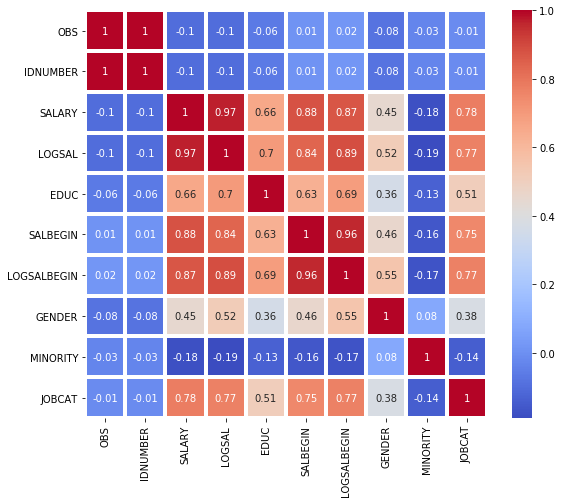

In [8]:
f, ax = plt.subplots(figsize = (9,7.5))
sns.heatmap(round(df.corr(),2), cmap = 'coolwarm', linecolor='white', linewidths= 3, annot=True)

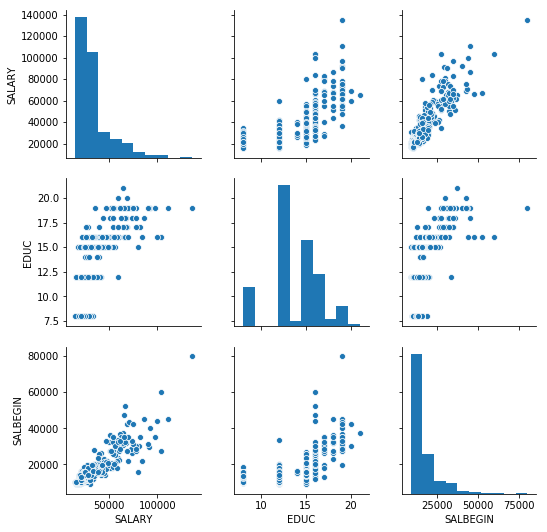

In [9]:
sns.pairplot(df[['SALARY', 'EDUC', 'SALBEGIN']])

In [10]:
y = df['SALARY']
X = pd.DataFrame(df['SALBEGIN'].values * df['EDUC'].values)

clf = LinearRegression()
clf.fit(X,y.values)

print('EDUC * SALBEGIN')
print(clf.coef_)
print()
print('Intercept:')
print(clf.intercept_)

EDUC * SALBEGIN
[0.09097301]

Intercept:
12229.400957973754


In [11]:
y = df['SALARY']
X = df['EDUC']

clf = LinearRegression()
clf.fit(X.values.reshape(-1, 1),y.values)

print('EDUC:')
print(clf.coef_)
print()
print('Intercept:')
print(clf.intercept_)

EDUC:
[3909.90670647]

Intercept:
-18331.178033480093


In [12]:
y = df[['SALARY']]
X = df[['EDUC']]

clf = LinearRegression()
clf.fit(X,y)

print('EDUC:')
print(clf.coef_)
print()
print('Intercept:')
print(clf.intercept_)

EDUC:
[[3909.90670647]]

Intercept:
[-18331.17803348]


Text(0, 0.5, 'Salary')

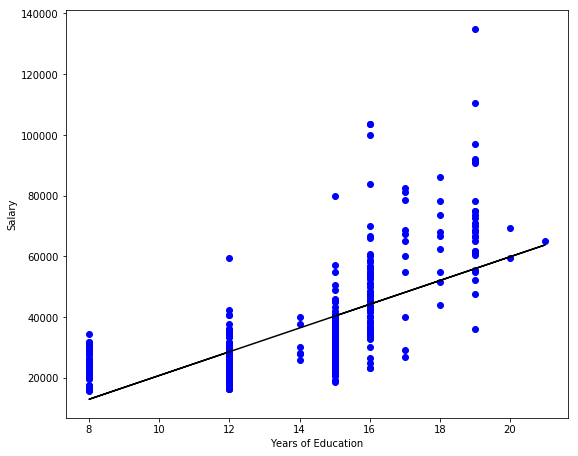

In [13]:
def linRegplot(X,y,clf):
    plt.scatter(X,y, c = 'blue')
    plt.plot(X, clf.predict(X), c = 'black')
    return None

y = df[['SALARY']]
X = df[['EDUC']]

f, ax = plt.subplots(figsize = (9,7.5))
linRegplot(X,y,clf)
plt.xlabel('Years of Education')
plt.ylabel('Salary')

Text(0, 0.5, 'Logarithm of Salary')

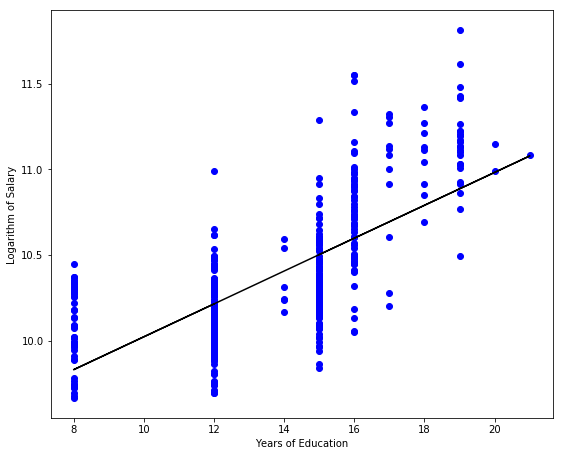

In [14]:
y = df[['LOGSAL']]
X = df[['EDUC']]

clf = LinearRegression()
clf.fit(X,y)

f, ax = plt.subplots(figsize = (9,7.5))
linRegplot(X,y,clf)
plt.xlabel('Years of Education')
plt.ylabel('Logarithm of Salary')

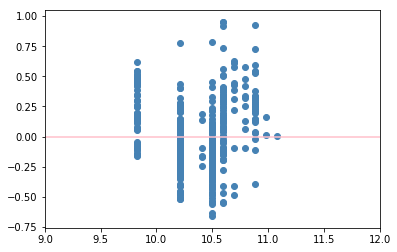

In [15]:
# Residuals
plt.scatter(clf.predict(X), y - clf.predict(X), c = 'steelblue')
plt.hlines(y = 0, xmin = 9, xmax = 12, color = 'pink')
plt.xlim(9,12)
plt.show()

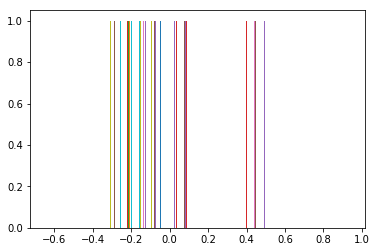

In [16]:
res = y - clf.predict(X)
plt.hist(res, bins = 10)
plt.show()

Text(0, 0.5, 'Logarithm of Beginning Salary')

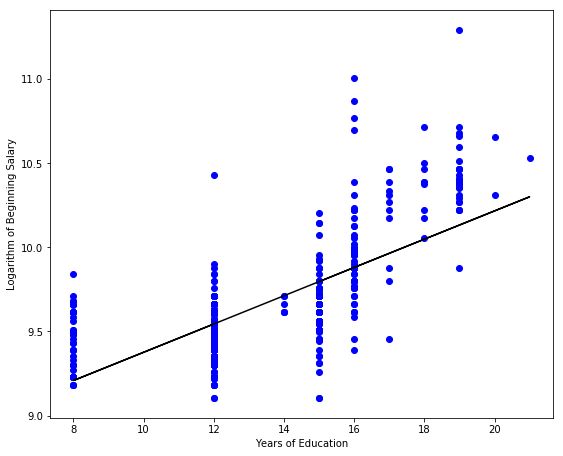

In [17]:
y = df[['LOGSALBEGIN']]
X = df[['EDUC']]

clf = LinearRegression()
clf.fit(X,y)

f, ax = plt.subplots(figsize = (9,7.5))
linRegplot(X,y,clf)
plt.xlabel('Years of Education')
plt.ylabel('Logarithm of Beginning Salary')

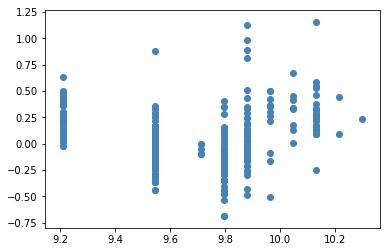

In [18]:
# Residuals
plt.scatter(clf.predict(X), y - clf.predict(X), c = 'steelblue')
plt.show()

In [19]:
y = df[['LOGSAL']]
X = df[['EDUC', 'LOGSALBEGIN']]

clf = LinearRegression()
clf.fit(X,y)

print('EDUC, LOGSALBEGIN:')
print(clf.coef_)
print()
print('Intercept:')
print(clf.intercept_)

EDUC, LOGSALBEGIN:
[[0.02312227 0.8685045 ]]

Intercept:
[1.64691575]


In [20]:
import statsmodels.formula.api as sm
result = sm.ols(formula = 'LOGSAL ~ EDUC + LOGSALBEGIN', data = df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 LOGSAL   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     945.4
Date:                Tue, 23 Oct 2018   Prob (F-statistic):          1.25e-165
Time:                        13:26:21   Log-Likelihood:                 147.54
No. Observations:                 474   AIC:                            -289.1
Df Residuals:                     471   BIC:                            -276.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6469      0.275      5.998      